In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/ananyaagarwal/Downloads/Skin_NonSkin.txt", names=['B', 'G', 'R', 'target'], sep="\t", index_col=False)
df.head()

,B,G,R,target
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [3]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, :-1].values
  y = dfi.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Optimize the SVM using grid search with cross-validation
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['linear', 'rbf', 'sigmoid']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)
  # Train and test the SVM with the best parameters
  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=1000)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

-------- Sample 0-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.923 total time=   2.3s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   2.2s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   2.0s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   3.4s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   3.4s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

[CV 2/3; 17/48] END C=1, gamma=0.01, kernel=rbf;, score=0.952 total time=   4.5s
[CV 3/3; 17/48] START C=1, gamma=0.01, kernel=rbf...............................
[CV 3/3; 17/48] END C=1, gamma=0.01, kernel=rbf;, score=0.948 total time=   4.3s
[CV 1/3; 18/48] START C=1, gamma=0.01, kernel=sigmoid...........................
[CV 1/3; 18/48] END C=1, gamma=0.01, kernel=sigmoid;, score=0.925 total time=   3.1s
[CV 2/3; 18/48] START C=1, gamma=0.01, kernel=sigmoid...........................
[CV 2/3; 18/48] END C=1, gamma=0.01, kernel=sigmoid;, score=0.936 total time=   3.2s
[CV 3/3; 18/48] START C=1, gamma=0.01, kernel=sigmoid...........................
[CV 3/3; 18/48] END C=1, gamma=0.01, kernel=sigmoid;, score=0.927 total time=   3.1s
[CV 1/3; 19/48] START C=1, gamma=0.001, kernel=linear...........................
[CV 1/3; 19/48] END C=1, gamma=0.001, kernel=linear;, score=0.922 total time=   2.6s
[CV 2/3; 19/48] START C=1, gamma=0.001, kernel=linear...........................
[CV 2/3; 19/

[CV 1/3; 34/48] END C=10, gamma=0.0001, kernel=linear;, score=0.922 total time=   5.0s
[CV 2/3; 34/48] START C=10, gamma=0.0001, kernel=linear.........................
[CV 2/3; 34/48] END C=10, gamma=0.0001, kernel=linear;, score=0.933 total time=   4.8s
[CV 3/3; 34/48] START C=10, gamma=0.0001, kernel=linear.........................
[CV 3/3; 34/48] END C=10, gamma=0.0001, kernel=linear;, score=0.925 total time=   4.5s
[CV 1/3; 35/48] START C=10, gamma=0.0001, kernel=rbf............................
[CV 1/3; 35/48] END C=10, gamma=0.0001, kernel=rbf;, score=0.935 total time=   6.9s
[CV 2/3; 35/48] START C=10, gamma=0.0001, kernel=rbf............................
[CV 2/3; 35/48] END C=10, gamma=0.0001, kernel=rbf;, score=0.940 total time=   7.0s
[CV 3/3; 35/48] START C=10, gamma=0.0001, kernel=rbf............................
[CV 3/3; 35/48] END C=10, gamma=0.0001, kernel=rbf;, score=0.936 total time=   6.9s
[CV 1/3; 36/48] START C=10, gamma=0.0001, kernel=sigmoid........................
[

[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   3.2s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   3.3s
[CV 1/3; 3/48] START C=0.1, gamma=0.1, kernel=sigmoid...........................
[CV 1/3; 3/48] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.923 total time=   3.8s
[CV 2/3; 3/48] START C=0.1, gamma=0.1, kernel=sigmoid...........................
[CV 2/3; 3/48] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.918 total time=   3.7s
[CV 3/3; 3/48] START C=0.1, gamma=0.1, kernel=sigmoid...........................
[CV 3/3; 3/48] END C=0.1, gamma=0.1, kernel=sigmoid;, score=0.925 total time=   3.9s
[CV 1/3; 4/48] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 1/3; 4/48] END C=0.1, gamma=0.01, kernel=linear;, score=0.934 total time=   2.1s
[CV 2/3; 4/48] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 2/3; 4/4

[CV 1/3; 19/48] END C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   2.5s
[CV 2/3; 19/48] START C=1, gamma=0.001, kernel=linear...........................
[CV 2/3; 19/48] END C=1, gamma=0.001, kernel=linear;, score=0.927 total time=   2.5s
[CV 3/3; 19/48] START C=1, gamma=0.001, kernel=linear...........................
[CV 3/3; 19/48] END C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   2.5s
[CV 1/3; 20/48] START C=1, gamma=0.001, kernel=rbf..............................
[CV 1/3; 20/48] END C=1, gamma=0.001, kernel=rbf;, score=0.942 total time=   6.8s
[CV 2/3; 20/48] START C=1, gamma=0.001, kernel=rbf..............................
[CV 2/3; 20/48] END C=1, gamma=0.001, kernel=rbf;, score=0.935 total time=   6.8s
[CV 3/3; 20/48] START C=1, gamma=0.001, kernel=rbf..............................
[CV 3/3; 20/48] END C=1, gamma=0.001, kernel=rbf;, score=0.942 total time=   6.8s
[CV 1/3; 21/48] START C=1, gamma=0.001, kernel=sigmoid..........................
[CV 1/3; 21/4

[CV 3/3; 35/48] END C=10, gamma=0.0001, kernel=rbf;, score=0.941 total time=   6.8s
[CV 1/3; 36/48] START C=10, gamma=0.0001, kernel=sigmoid........................
[CV 1/3; 36/48] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.941 total time=   5.2s
[CV 2/3; 36/48] START C=10, gamma=0.0001, kernel=sigmoid........................
[CV 2/3; 36/48] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.934 total time=   5.3s
[CV 3/3; 36/48] START C=10, gamma=0.0001, kernel=sigmoid........................
[CV 3/3; 36/48] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.941 total time=   5.2s
[CV 1/3; 37/48] START C=100, gamma=0.1, kernel=linear...........................
[CV 1/3; 37/48] END C=100, gamma=0.1, kernel=linear;, score=0.934 total time=  11.7s
[CV 2/3; 37/48] START C=100, gamma=0.1, kernel=linear...........................
[CV 2/3; 37/48] END C=100, gamma=0.1, kernel=linear;, score=0.927 total time=  10.6s
[CV 3/3; 37/48] START C=100, gamma=0.1, kernel=linear........................

[CV 1/3; 4/48] END C=0.1, gamma=0.01, kernel=linear;, score=0.935 total time=   2.1s
[CV 2/3; 4/48] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 2/3; 4/48] END C=0.1, gamma=0.01, kernel=linear;, score=0.929 total time=   2.0s
[CV 3/3; 4/48] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 3/3; 4/48] END C=0.1, gamma=0.01, kernel=linear;, score=0.931 total time=   2.1s
[CV 1/3; 5/48] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 1/3; 5/48] END C=0.1, gamma=0.01, kernel=rbf;, score=0.942 total time=   6.6s
[CV 2/3; 5/48] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 2/3; 5/48] END C=0.1, gamma=0.01, kernel=rbf;, score=0.937 total time=   6.6s
[CV 3/3; 5/48] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 3/3; 5/48] END C=0.1, gamma=0.01, kernel=rbf;, score=0.936 total time=   6.5s
[CV 1/3; 6/48] START C=0.1, gamma=0.01, kernel=sigmoid..........................
[CV 1/3; 6/48

[CV 3/3; 20/48] END C=1, gamma=0.001, kernel=rbf;, score=0.936 total time=   6.8s
[CV 1/3; 21/48] START C=1, gamma=0.001, kernel=sigmoid..........................
[CV 1/3; 21/48] END C=1, gamma=0.001, kernel=sigmoid;, score=0.940 total time=   5.2s
[CV 2/3; 21/48] START C=1, gamma=0.001, kernel=sigmoid..........................
[CV 2/3; 21/48] END C=1, gamma=0.001, kernel=sigmoid;, score=0.936 total time=   5.4s
[CV 3/3; 21/48] START C=1, gamma=0.001, kernel=sigmoid..........................
[CV 3/3; 21/48] END C=1, gamma=0.001, kernel=sigmoid;, score=0.933 total time= 2.3min
[CV 1/3; 22/48] START C=1, gamma=0.0001, kernel=linear..........................
[CV 1/3; 22/48] END C=1, gamma=0.0001, kernel=linear;, score=0.932 total time=   3.6s
[CV 2/3; 22/48] START C=1, gamma=0.0001, kernel=linear..........................
[CV 2/3; 22/48] END C=1, gamma=0.0001, kernel=linear;, score=0.928 total time=   2.7s
[CV 3/3; 22/48] START C=1, gamma=0.0001, kernel=linear..........................
[C

[CV 2/3; 37/48] END C=100, gamma=0.1, kernel=linear;, score=0.928 total time=  10.4s
[CV 3/3; 37/48] START C=100, gamma=0.1, kernel=linear...........................
[CV 3/3; 37/48] END C=100, gamma=0.1, kernel=linear;, score=0.931 total time=  11.9s
[CV 1/3; 38/48] START C=100, gamma=0.1, kernel=rbf..............................
[CV 1/3; 38/48] END C=100, gamma=0.1, kernel=rbf;, score=0.997 total time=   0.4s
[CV 2/3; 38/48] START C=100, gamma=0.1, kernel=rbf..............................
[CV 2/3; 38/48] END C=100, gamma=0.1, kernel=rbf;, score=0.997 total time=   0.4s
[CV 3/3; 38/48] START C=100, gamma=0.1, kernel=rbf..............................
[CV 3/3; 38/48] END C=100, gamma=0.1, kernel=rbf;, score=0.997 total time=   0.4s
[CV 1/3; 39/48] START C=100, gamma=0.1, kernel=sigmoid..........................
[CV 1/3; 39/48] END C=100, gamma=0.1, kernel=sigmoid;, score=0.879 total time=   2.1s
[CV 2/3; 39/48] START C=100, gamma=0.1, kernel=sigmoid..........................
[CV 2/3; 39/

[CV 3/3; 5/48] END C=0.1, gamma=0.01, kernel=rbf;, score=0.941 total time=   6.5s
[CV 1/3; 6/48] START C=0.1, gamma=0.01, kernel=sigmoid..........................
[CV 1/3; 6/48] END C=0.1, gamma=0.01, kernel=sigmoid;, score=0.939 total time=   5.1s
[CV 2/3; 6/48] START C=0.1, gamma=0.01, kernel=sigmoid..........................
[CV 2/3; 6/48] END C=0.1, gamma=0.01, kernel=sigmoid;, score=0.935 total time=   5.4s
[CV 3/3; 6/48] START C=0.1, gamma=0.01, kernel=sigmoid..........................
[CV 3/3; 6/48] END C=0.1, gamma=0.01, kernel=sigmoid;, score=0.941 total time=   5.4s
[CV 1/3; 7/48] START C=0.1, gamma=0.001, kernel=linear..........................
[CV 1/3; 7/48] END C=0.1, gamma=0.001, kernel=linear;, score=0.928 total time=   2.1s
[CV 2/3; 7/48] START C=0.1, gamma=0.001, kernel=linear..........................
[CV 2/3; 7/48] END C=0.1, gamma=0.001, kernel=linear;, score=0.924 total time=   1.9s
[CV 3/3; 7/48] START C=0.1, gamma=0.001, kernel=linear..........................
[C

[CV 2/3; 22/48] END C=1, gamma=0.0001, kernel=linear;, score=0.923 total time=   2.6s
[CV 3/3; 22/48] START C=1, gamma=0.0001, kernel=linear..........................
[CV 3/3; 22/48] END C=1, gamma=0.0001, kernel=linear;, score=0.932 total time=   2.5s
[CV 1/3; 23/48] START C=1, gamma=0.0001, kernel=rbf.............................
[CV 1/3; 23/48] END C=1, gamma=0.0001, kernel=rbf;, score=0.790 total time=   9.8s
[CV 2/3; 23/48] START C=1, gamma=0.0001, kernel=rbf.............................
[CV 2/3; 23/48] END C=1, gamma=0.0001, kernel=rbf;, score=0.789 total time=   9.8s
[CV 3/3; 23/48] START C=1, gamma=0.0001, kernel=rbf.............................
[CV 3/3; 23/48] END C=1, gamma=0.0001, kernel=rbf;, score=0.790 total time=   9.8s
[CV 1/3; 24/48] START C=1, gamma=0.0001, kernel=sigmoid.........................
[CV 1/3; 24/48] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.790 total time= 7.8min
[CV 2/3; 24/48] START C=1, gamma=0.0001, kernel=sigmoid.........................
[CV 2/

[CV 1/3; 39/48] END C=100, gamma=0.1, kernel=sigmoid;, score=0.876 total time=   2.9s
[CV 2/3; 39/48] START C=100, gamma=0.1, kernel=sigmoid..........................
[CV 2/3; 39/48] END C=100, gamma=0.1, kernel=sigmoid;, score=0.864 total time=   2.8s
[CV 3/3; 39/48] START C=100, gamma=0.1, kernel=sigmoid..........................
[CV 3/3; 39/48] END C=100, gamma=0.1, kernel=sigmoid;, score=0.874 total time=   2.8s
[CV 1/3; 40/48] START C=100, gamma=0.01, kernel=linear..........................
[CV 1/3; 40/48] END C=100, gamma=0.01, kernel=linear;, score=0.928 total time=  12.9s
[CV 2/3; 40/48] START C=100, gamma=0.01, kernel=linear..........................
[CV 2/3; 40/48] END C=100, gamma=0.01, kernel=linear;, score=0.923 total time=  10.9s
[CV 3/3; 40/48] START C=100, gamma=0.01, kernel=linear..........................
[CV 3/3; 40/48] END C=100, gamma=0.01, kernel=linear;, score=0.932 total time=  12.6s
[CV 1/3; 41/48] START C=100, gamma=0.01, kernel=rbf............................

[CV 2/3; 7/48] END C=0.1, gamma=0.001, kernel=linear;, score=0.929 total time=   2.1s
[CV 3/3; 7/48] START C=0.1, gamma=0.001, kernel=linear..........................
[CV 3/3; 7/48] END C=0.1, gamma=0.001, kernel=linear;, score=0.938 total time=   2.2s
[CV 1/3; 8/48] START C=0.1, gamma=0.001, kernel=rbf.............................
[CV 1/3; 8/48] END C=0.1, gamma=0.001, kernel=rbf;, score=0.787 total time=  10.1s
[CV 2/3; 8/48] START C=0.1, gamma=0.001, kernel=rbf.............................
[CV 2/3; 8/48] END C=0.1, gamma=0.001, kernel=rbf;, score=0.788 total time=  10.2s
[CV 3/3; 8/48] START C=0.1, gamma=0.001, kernel=rbf.............................
[CV 3/3; 8/48] END C=0.1, gamma=0.001, kernel=rbf;, score=0.788 total time=  10.2s
[CV 1/3; 9/48] START C=0.1, gamma=0.001, kernel=sigmoid.........................
[CV 1/3; 9/48] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.788 total time=   6.4s
[CV 2/3; 9/48] START C=0.1, gamma=0.001, kernel=sigmoid.........................
[CV 2/

[CV 1/3; 24/48] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.788 total time=   6.5s
[CV 2/3; 24/48] START C=1, gamma=0.0001, kernel=sigmoid.........................
[CV 2/3; 24/48] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.788 total time=   6.5s
[CV 3/3; 24/48] START C=1, gamma=0.0001, kernel=sigmoid.........................
[CV 3/3; 24/48] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.788 total time=   6.5s
[CV 1/3; 25/48] START C=10, gamma=0.1, kernel=linear............................
[CV 1/3; 25/48] END C=10, gamma=0.1, kernel=linear;, score=0.928 total time=   5.0s
[CV 2/3; 25/48] START C=10, gamma=0.1, kernel=linear............................
[CV 2/3; 25/48] END C=10, gamma=0.1, kernel=linear;, score=0.928 total time=   4.9s
[CV 3/3; 25/48] START C=10, gamma=0.1, kernel=linear............................
[CV 3/3; 25/48] END C=10, gamma=0.1, kernel=linear;, score=0.937 total time=   5.0s
[CV 1/3; 26/48] START C=10, gamma=0.1, kernel=rbf...............................
[

[CV 3/3; 40/48] END C=100, gamma=0.01, kernel=linear;, score=0.937 total time=  12.3s
[CV 1/3; 41/48] START C=100, gamma=0.01, kernel=rbf.............................
[CV 1/3; 41/48] END C=100, gamma=0.01, kernel=rbf;, score=0.990 total time=   1.4s
[CV 2/3; 41/48] START C=100, gamma=0.01, kernel=rbf.............................
[CV 2/3; 41/48] END C=100, gamma=0.01, kernel=rbf;, score=0.990 total time=   1.4s
[CV 3/3; 41/48] START C=100, gamma=0.01, kernel=rbf.............................
[CV 3/3; 41/48] END C=100, gamma=0.01, kernel=rbf;, score=0.991 total time=   1.5s
[CV 1/3; 42/48] START C=100, gamma=0.01, kernel=sigmoid.........................
[CV 1/3; 42/48] END C=100, gamma=0.01, kernel=sigmoid;, score=0.900 total time=   3.8s
[CV 2/3; 42/48] START C=100, gamma=0.01, kernel=sigmoid.........................
[CV 2/3; 42/48] END C=100, gamma=0.01, kernel=sigmoid;, score=0.921 total time=   4.6s
[CV 3/3; 42/48] START C=100, gamma=0.01, kernel=sigmoid.........................
[CV 3

[CV 1/3; 9/48] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.793 total time=   6.1s
[CV 2/3; 9/48] START C=0.1, gamma=0.001, kernel=sigmoid.........................
[CV 2/3; 9/48] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.793 total time=   6.1s
[CV 3/3; 9/48] START C=0.1, gamma=0.001, kernel=sigmoid.........................
[CV 3/3; 9/48] END C=0.1, gamma=0.001, kernel=sigmoid;, score=0.793 total time=   6.1s
[CV 1/3; 10/48] START C=0.1, gamma=0.0001, kernel=linear........................
[CV 1/3; 10/48] END C=0.1, gamma=0.0001, kernel=linear;, score=0.925 total time=   2.1s
[CV 2/3; 10/48] START C=0.1, gamma=0.0001, kernel=linear........................
[CV 2/3; 10/48] END C=0.1, gamma=0.0001, kernel=linear;, score=0.931 total time=   2.2s
[CV 3/3; 10/48] START C=0.1, gamma=0.0001, kernel=linear........................
[CV 3/3; 10/48] END C=0.1, gamma=0.0001, kernel=linear;, score=0.925 total time=   2.0s
[CV 1/3; 11/48] START C=0.1, gamma=0.0001, kernel=rbf.................

[CV 3/3; 25/48] END C=10, gamma=0.1, kernel=linear;, score=0.925 total time=   5.0s
[CV 1/3; 26/48] START C=10, gamma=0.1, kernel=rbf...............................
[CV 1/3; 26/48] END C=10, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.7s
[CV 2/3; 26/48] START C=10, gamma=0.1, kernel=rbf...............................
[CV 2/3; 26/48] END C=10, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.7s
[CV 3/3; 26/48] START C=10, gamma=0.1, kernel=rbf...............................
[CV 3/3; 26/48] END C=10, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.8s
[CV 1/3; 27/48] START C=10, gamma=0.1, kernel=sigmoid...........................
[CV 1/3; 27/48] END C=10, gamma=0.1, kernel=sigmoid;, score=0.864 total time=   2.1s
[CV 2/3; 27/48] START C=10, gamma=0.1, kernel=sigmoid...........................
[CV 2/3; 27/48] END C=10, gamma=0.1, kernel=sigmoid;, score=0.840 total time=   3.0s
[CV 3/3; 27/48] START C=10, gamma=0.1, kernel=sigmoid...........................
[CV 3/3; 27/48] E

[CV 2/3; 42/48] END C=100, gamma=0.01, kernel=sigmoid;, score=0.917 total time=   4.6s
[CV 3/3; 42/48] START C=100, gamma=0.01, kernel=sigmoid.........................
[CV 3/3; 42/48] END C=100, gamma=0.01, kernel=sigmoid;, score=0.916 total time=   4.3s
[CV 1/3; 43/48] START C=100, gamma=0.001, kernel=linear.........................
[CV 1/3; 43/48] END C=100, gamma=0.001, kernel=linear;, score=0.925 total time=  13.2s
[CV 2/3; 43/48] START C=100, gamma=0.001, kernel=linear.........................
[CV 2/3; 43/48] END C=100, gamma=0.001, kernel=linear;, score=0.931 total time=  13.0s
[CV 3/3; 43/48] START C=100, gamma=0.001, kernel=linear.........................
[CV 3/3; 43/48] END C=100, gamma=0.001, kernel=linear;, score=0.925 total time=  11.8s
[CV 1/3; 44/48] START C=100, gamma=0.001, kernel=rbf............................
[CV 1/3; 44/48] END C=100, gamma=0.001, kernel=rbf;, score=0.949 total time=   4.3s
[CV 2/3; 44/48] START C=100, gamma=0.001, kernel=rbf........................

[CV 3/3; 10/48] END C=0.1, gamma=0.0001, kernel=linear;, score=0.936 total time=   2.1s
[CV 1/3; 11/48] START C=0.1, gamma=0.0001, kernel=rbf...........................
[CV 1/3; 11/48] END C=0.1, gamma=0.0001, kernel=rbf;, score=0.794 total time=   9.6s
[CV 2/3; 11/48] START C=0.1, gamma=0.0001, kernel=rbf...........................
[CV 2/3; 11/48] END C=0.1, gamma=0.0001, kernel=rbf;, score=0.794 total time=   9.7s
[CV 3/3; 11/48] START C=0.1, gamma=0.0001, kernel=rbf...........................
[CV 3/3; 11/48] END C=0.1, gamma=0.0001, kernel=rbf;, score=0.794 total time=   9.8s
[CV 1/3; 12/48] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 1/3; 12/48] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.794 total time=   6.2s
[CV 2/3; 12/48] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 2/3; 12/48] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.794 total time=   6.1s
[CV 3/3; 12/48] START C=0.1, gamma=0.0001, kernel=sigmoid.................

[CV 2/3; 27/48] END C=10, gamma=0.1, kernel=sigmoid;, score=0.868 total time=   2.0s
[CV 3/3; 27/48] START C=10, gamma=0.1, kernel=sigmoid...........................
[CV 3/3; 27/48] END C=10, gamma=0.1, kernel=sigmoid;, score=0.847 total time=   2.9s
[CV 1/3; 28/48] START C=10, gamma=0.01, kernel=linear...........................
[CV 1/3; 28/48] END C=10, gamma=0.01, kernel=linear;, score=0.934 total time=   4.7s
[CV 2/3; 28/48] START C=10, gamma=0.01, kernel=linear...........................
[CV 2/3; 28/48] END C=10, gamma=0.01, kernel=linear;, score=0.923 total time=   4.4s
[CV 3/3; 28/48] START C=10, gamma=0.01, kernel=linear...........................
[CV 3/3; 28/48] END C=10, gamma=0.01, kernel=linear;, score=0.936 total time=   4.9s
[CV 1/3; 29/48] START C=10, gamma=0.01, kernel=rbf..............................
[CV 1/3; 29/48] END C=10, gamma=0.01, kernel=rbf;, score=0.977 total time=   2.9s
[CV 2/3; 29/48] START C=10, gamma=0.01, kernel=rbf..............................
[CV 2/3

[CV 1/3; 44/48] END C=100, gamma=0.001, kernel=rbf;, score=0.951 total time=   4.5s
[CV 2/3; 44/48] START C=100, gamma=0.001, kernel=rbf............................
[CV 2/3; 44/48] END C=100, gamma=0.001, kernel=rbf;, score=0.944 total time=   4.1s
[CV 3/3; 44/48] START C=100, gamma=0.001, kernel=rbf............................
[CV 3/3; 44/48] END C=100, gamma=0.001, kernel=rbf;, score=0.951 total time=   4.4s
[CV 1/3; 45/48] START C=100, gamma=0.001, kernel=sigmoid........................
[CV 1/3; 45/48] END C=100, gamma=0.001, kernel=sigmoid;, score=0.934 total time=   3.2s
[CV 2/3; 45/48] START C=100, gamma=0.001, kernel=sigmoid........................
[CV 2/3; 45/48] END C=100, gamma=0.001, kernel=sigmoid;, score=0.923 total time=   2.9s
[CV 3/3; 45/48] START C=100, gamma=0.001, kernel=sigmoid........................
[CV 3/3; 45/48] END C=100, gamma=0.001, kernel=sigmoid;, score=0.936 total time=   3.1s
[CV 1/3; 46/48] START C=100, gamma=0.0001, kernel=linear.......................

[CV 2/3; 12/48] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.791 total time=   6.2s
[CV 3/3; 12/48] START C=0.1, gamma=0.0001, kernel=sigmoid.......................
[CV 3/3; 12/48] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.791 total time=   6.2s
[CV 1/3; 13/48] START C=1, gamma=0.1, kernel=linear.............................
[CV 1/3; 13/48] END C=1, gamma=0.1, kernel=linear;, score=0.927 total time=   3.2s
[CV 2/3; 13/48] START C=1, gamma=0.1, kernel=linear.............................
[CV 2/3; 13/48] END C=1, gamma=0.1, kernel=linear;, score=0.928 total time=   2.8s
[CV 3/3; 13/48] START C=1, gamma=0.1, kernel=linear.............................
[CV 3/3; 13/48] END C=1, gamma=0.1, kernel=linear;, score=0.930 total time=   3.2s
[CV 1/3; 14/48] START C=1, gamma=0.1, kernel=rbf................................
[CV 1/3; 14/48] END .C=1, gamma=0.1, kernel=rbf;, score=0.991 total time=   1.5s
[CV 2/3; 14/48] START C=1, gamma=0.1, kernel=rbf................................
[CV 2/

[CV 1/3; 29/48] END C=10, gamma=0.01, kernel=rbf;, score=0.976 total time=   2.7s
[CV 2/3; 29/48] START C=10, gamma=0.01, kernel=rbf..............................
[CV 2/3; 29/48] END C=10, gamma=0.01, kernel=rbf;, score=0.977 total time=   2.8s
[CV 3/3; 29/48] START C=10, gamma=0.01, kernel=rbf..............................
[CV 3/3; 29/48] END C=10, gamma=0.01, kernel=rbf;, score=0.981 total time=   2.9s
[CV 1/3; 30/48] START C=10, gamma=0.01, kernel=sigmoid..........................
[CV 1/3; 30/48] END C=10, gamma=0.01, kernel=sigmoid;, score=0.926 total time=   3.0s
[CV 2/3; 30/48] START C=10, gamma=0.01, kernel=sigmoid..........................
[CV 2/3; 30/48] END C=10, gamma=0.01, kernel=sigmoid;, score=0.926 total time=   3.0s
[CV 3/3; 30/48] START C=10, gamma=0.01, kernel=sigmoid..........................
[CV 3/3; 30/48] END C=10, gamma=0.01, kernel=sigmoid;, score=0.930 total time=   3.0s
[CV 1/3; 31/48] START C=10, gamma=0.001, kernel=linear..........................
[CV 1/3; 3

[CV 3/3; 45/48] END C=100, gamma=0.001, kernel=sigmoid;, score=0.931 total time=   3.1s
[CV 1/3; 46/48] START C=100, gamma=0.0001, kernel=linear........................
[CV 1/3; 46/48] END C=100, gamma=0.0001, kernel=linear;, score=0.927 total time=  10.7s
[CV 2/3; 46/48] START C=100, gamma=0.0001, kernel=linear........................
[CV 2/3; 46/48] END C=100, gamma=0.0001, kernel=linear;, score=0.928 total time=  12.2s
[CV 3/3; 46/48] START C=100, gamma=0.0001, kernel=linear........................
[CV 3/3; 46/48] END C=100, gamma=0.0001, kernel=linear;, score=0.930 total time=  12.8s
[CV 1/3; 47/48] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 1/3; 47/48] END C=100, gamma=0.0001, kernel=rbf;, score=0.934 total time=   5.0s
[CV 2/3; 47/48] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 2/3; 47/48] END C=100, gamma=0.0001, kernel=rbf;, score=0.932 total time=   5.0s
[CV 3/3; 47/48] START C=100, gamma=0.0001, kernel=rbf....................

[CV 1/3; 14/48] END .C=1, gamma=0.1, kernel=rbf;, score=0.990 total time=   1.4s
[CV 2/3; 14/48] START C=1, gamma=0.1, kernel=rbf................................
[CV 2/3; 14/48] END .C=1, gamma=0.1, kernel=rbf;, score=0.992 total time=   1.4s
[CV 3/3; 14/48] START C=1, gamma=0.1, kernel=rbf................................
[CV 3/3; 14/48] END .C=1, gamma=0.1, kernel=rbf;, score=0.990 total time=   1.4s
[CV 1/3; 15/48] START C=1, gamma=0.1, kernel=sigmoid............................
[CV 1/3; 15/48] END C=1, gamma=0.1, kernel=sigmoid;, score=0.884 total time=   3.3s
[CV 2/3; 15/48] START C=1, gamma=0.1, kernel=sigmoid............................
[CV 2/3; 15/48] END C=1, gamma=0.1, kernel=sigmoid;, score=0.888 total time=   3.2s
[CV 3/3; 15/48] START C=1, gamma=0.1, kernel=sigmoid............................
[CV 3/3; 15/48] END C=1, gamma=0.1, kernel=sigmoid;, score=0.878 total time=   3.4s
[CV 1/3; 16/48] START C=1, gamma=0.01, kernel=linear............................
[CV 1/3; 16/48] END

[CV 3/3; 30/48] END C=10, gamma=0.01, kernel=sigmoid;, score=0.928 total time=   2.9s
[CV 1/3; 31/48] START C=10, gamma=0.001, kernel=linear..........................
[CV 1/3; 31/48] END C=10, gamma=0.001, kernel=linear;, score=0.927 total time=   4.5s
[CV 2/3; 31/48] START C=10, gamma=0.001, kernel=linear..........................
[CV 2/3; 31/48] END C=10, gamma=0.001, kernel=linear;, score=0.927 total time=   3.9s
[CV 3/3; 31/48] START C=10, gamma=0.001, kernel=linear..........................
[CV 3/3; 31/48] END C=10, gamma=0.001, kernel=linear;, score=0.928 total time=   5.0s
[CV 1/3; 32/48] START C=10, gamma=0.001, kernel=rbf.............................
[CV 1/3; 32/48] END C=10, gamma=0.001, kernel=rbf;, score=0.939 total time=   4.9s
[CV 2/3; 32/48] START C=10, gamma=0.001, kernel=rbf.............................
[CV 2/3; 32/48] END C=10, gamma=0.001, kernel=rbf;, score=0.935 total time=   4.8s
[CV 3/3; 32/48] START C=10, gamma=0.001, kernel=rbf.............................
[CV 

[CV 2/3; 47/48] END C=100, gamma=0.0001, kernel=rbf;, score=0.928 total time=   4.9s
[CV 3/3; 47/48] START C=100, gamma=0.0001, kernel=rbf...........................
[CV 3/3; 47/48] END C=100, gamma=0.0001, kernel=rbf;, score=0.932 total time=   5.2s
[CV 1/3; 48/48] START C=100, gamma=0.0001, kernel=sigmoid.......................
[CV 1/3; 48/48] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.931 total time=   3.2s
[CV 2/3; 48/48] START C=100, gamma=0.0001, kernel=sigmoid.......................
[CV 2/3; 48/48] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.928 total time=   3.1s
[CV 3/3; 48/48] START C=100, gamma=0.0001, kernel=sigmoid.......................
[CV 3/3; 48/48] END C=100, gamma=0.0001, kernel=sigmoid;, score=0.930 total time=   3.2s
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
-------- Sample 9-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, ga

[CV 3/3; 15/48] END C=1, gamma=0.1, kernel=sigmoid;, score=0.884 total time=   3.1s
[CV 1/3; 16/48] START C=1, gamma=0.01, kernel=linear............................
[CV 1/3; 16/48] END C=1, gamma=0.01, kernel=linear;, score=0.927 total time=   2.5s
[CV 2/3; 16/48] START C=1, gamma=0.01, kernel=linear............................
[CV 2/3; 16/48] END C=1, gamma=0.01, kernel=linear;, score=0.935 total time=   2.5s
[CV 3/3; 16/48] START C=1, gamma=0.01, kernel=linear............................
[CV 3/3; 16/48] END C=1, gamma=0.01, kernel=linear;, score=0.929 total time=   2.5s
[CV 1/3; 17/48] START C=1, gamma=0.01, kernel=rbf...............................
[CV 1/3; 17/48] END C=1, gamma=0.01, kernel=rbf;, score=0.951 total time=   4.3s
[CV 2/3; 17/48] START C=1, gamma=0.01, kernel=rbf...............................
[CV 2/3; 17/48] END C=1, gamma=0.01, kernel=rbf;, score=0.951 total time=   4.2s
[CV 3/3; 17/48] START C=1, gamma=0.01, kernel=rbf...............................
[CV 3/3; 17/48] 

[CV 2/3; 32/48] END C=10, gamma=0.001, kernel=rbf;, score=0.942 total time=   4.9s
[CV 3/3; 32/48] START C=10, gamma=0.001, kernel=rbf.............................
[CV 3/3; 32/48] END C=10, gamma=0.001, kernel=rbf;, score=0.937 total time=   4.8s
[CV 1/3; 33/48] START C=10, gamma=0.001, kernel=sigmoid.........................
[CV 1/3; 33/48] END C=10, gamma=0.001, kernel=sigmoid;, score=0.935 total time=   3.1s
[CV 2/3; 33/48] START C=10, gamma=0.001, kernel=sigmoid.........................
[CV 2/3; 33/48] END C=10, gamma=0.001, kernel=sigmoid;, score=0.936 total time=   3.1s
[CV 3/3; 33/48] START C=10, gamma=0.001, kernel=sigmoid.........................
[CV 3/3; 33/48] END C=10, gamma=0.001, kernel=sigmoid;, score=0.932 total time=   3.1s
[CV 1/3; 34/48] START C=10, gamma=0.0001, kernel=linear.........................
[CV 1/3; 34/48] END C=10, gamma=0.0001, kernel=linear;, score=0.927 total time=   4.7s
[CV 2/3; 34/48] START C=10, gamma=0.0001, kernel=linear.........................


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [4]:
svm_best_params

[{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}]

In [5]:
test_accs

[0.9979597388465724,
 0.9983677910772579,
 0.9980957562568009,
 0.9972796517954298,
 0.9985038084874864,
 0.9982317736670294,
 0.9983677910772579,
 0.9975516866158868,
 0.9983677910772579,
 0.9975516866158868]

In [6]:
final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.99796,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
1,0.998368,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
2,0.998096,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.99728,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.998504,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.998232,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.998368,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.997552,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.998368,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.997552,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"


In [7]:
max_index = test_accs.index(max(test_accs))
max_index

4

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=max_index)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
iterations = list()
acc_list = list()

for i in range(1000):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [13]:
import numpy as np


iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [14]:
import numpy as np
print(iterations.shape)
print(acc_list.shape)

(1000,)
(1000,)


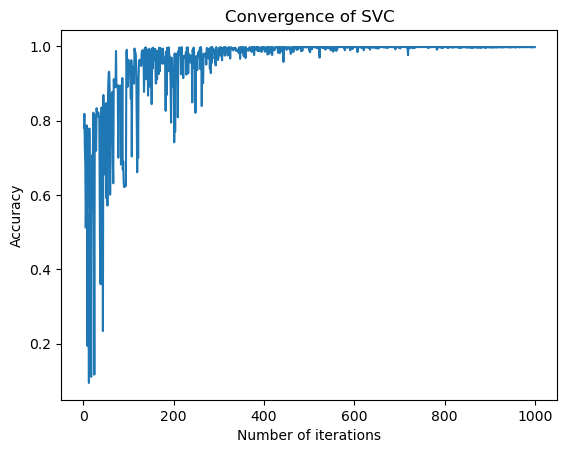

In [15]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()